# Heat Conduction Explicit

## Notes:
* equation to solve: $$\frac{\partial T}{\partial t} = \alpha \left( \frac{\partial^{2} T}{\partial x^{2}} +  \frac{\partial^{2} T}{\partial y^{2}}\right)$$

* want to know how long it takes the center of the chip to go from 20$^{o}$C to 70$^{o}$C given two sides at 100$^{o}$C and the other two sides at 0$^{o}$C

* discritizing and not ignoring error terms: $$\frac{T^{n+1}_{i,j} - T^{n}_{i,j}}{\Delta t} - O(\Delta t)= \alpha \left( \frac{T^{n}_{i+1,j} + T^{n}_{i-1,j} - 2T^{n}_{i,j}}{\Delta x^{2}} -  O(\Delta x^{2}) + \frac{T^{n}_{i,j+1} + T^{n}_{i,j-1} - 2T^{n}_{i,j}}{\Delta y^{2}} -  O(\Delta y^{2})\right)$$

* rearranging for $T^{n+1}_{i,j}$: $$T^{n+1}_{i,j} = T^{n}_{i,j} + \Delta t \left(O(\Delta t) + \alpha \left( \frac{T^{n}_{i+1,j} + T^{n}_{i-1,j} - 2T^{n}_{i,j}}{\Delta x^{2}} -  O(\Delta x^{2}) + \frac{T^{n}_{i,j+1} + T^{n}_{i,j-1} - 2T^{n}_{i,j}}{\Delta y^{2}} -  O(\Delta y^{2})\right)\right)$$
    * gathering the error terms, we get: $$T^{n+1}_{i,j} = T^{n}_{i,j} + \frac{\alpha\Delta t}{\Delta x^{2}}\left(T^{n}_{i+1,j} + T^{n}_{i-1,j} - 2T^{n}_{i,j}\right) + \frac{\alpha\Delta t}{\Delta y^{2}}\left(T^{n}_{i,j+1} + T^{n}_{i,j-1} - 2T^{n}_{i,j}\right) + \left(\Delta tO(\Delta t)-\alpha\Delta tO(\Delta x^{2})-\alpha\Delta tO(\Delta y^{2})\right)$$
    * like usual, we can ignore the error terms, and get the descritization to be: $$T^{n+1}_{i,j} = T^{n}_{i,j} + \frac{\alpha\Delta t}{\Delta x^{2}}\left(T^{n}_{i+1,j} + T^{n}_{i-1,j} - 2T^{n}_{i,j}\right) + \frac{\alpha\Delta t}{\Delta y^{2}}\left(T^{n}_{i,j+1} + T^{n}_{i,j-1} - 2T^{n}_{i,j}\right)$$
    * if we do a square mesh where $\Delta x = \Delta y = \delta$, we can get the following simplification: $$T^{n+1}_{i,j} = T^{n}_{i,j} + \frac{\alpha\Delta t}{\delta^{2}}\left(T^{n}_{i+1,j} + T^{n}_{i-1,j} - 2T^{n}_{i,j} + T^{n}_{i,j+1} + T^{n}_{i,j-1} - 2T^{n}_{i,j}\right)$$
    * in that case, our Stability Condition would be: $$\frac{\alpha\Delta t}{\delta^{2}} < \frac{1}{4}$$
    
* use i as y and x as j for this example

## Code: 
all the code will follow this cell. This is to ease runtime and to make sure the scope of all variables remains the same. different iterations of the same code with different values or methods of computing the same solution will be in subsquent cells, while code-notes will be commented like usual.

Center of plate reached 70C at time 0.16s.


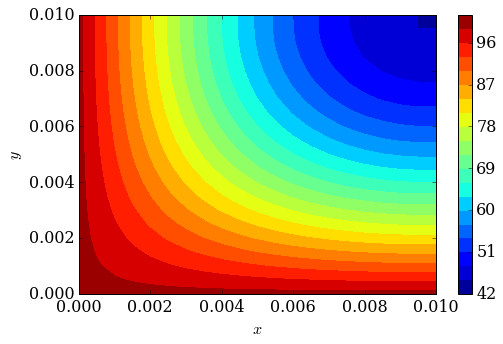

In [3]:
# Basic Imports
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

# Setting up initial conditions
L = 1.0e-2
H = 1.0e-2
nx = 21
ny = 21
nt = 500
dx = L/(nx-1)
dy = H/(ny-1)
x = numpy.linspace(0,L,nx)
y = numpy.linspace(0,H,ny)
alpha = 1e-4
Ti = numpy.ones((ny, nx))*20
Ti[0,:]= 100
Ti[:,0] = 100
sigma = 0.25
dt = sigma * min(dx, dy)**2 / alpha

# Define Main Function
def ftcs(T, nt, alpha, dt, dx, dy):

    #force j_mid and i_mid to be integers so we can use them as indices
    #for the array T
    j_mid = int((numpy.shape(T)[0])/2) 
    i_mid = int((numpy.shape(T)[1])/2)
   
    for n in range(nt):
        Tn = T.copy()
        T[1:-1,1:-1] = Tn[1:-1,1:-1] + alpha *\
            (dt/dy**2 * (Tn[2:,1:-1] - 2*Tn[1:-1,1:-1] + Tn[:-2,1:-1]) +\
             dt/dx**2 * (Tn[1:-1,2:] - 2*Tn[1:-1,1:-1] + Tn[1:-1,:-2]))
  
        # Enforce Neumann BCs
        T[-1,:] = T[-2,:]
        T[:,-1] = T[:,-2]
        
        # Check if we reached T=70C
        if T[j_mid, i_mid] >= 70:
            print ("Center of plate reached 70C at time {0:.2f}s.".format(dt*n))
            break
        
    if T[j_mid, i_mid]<70:
        print ("Center has not reached 70C yet, it is only {0:.2f}C.".format(T[j_mid, i_mid]))
        
    return T

T = ftcs(Ti.copy(), nt, alpha, dt, dx, dy)

# Visualize
mx, my = numpy.meshgrid(x,y)
pyplot.figure(figsize=(8,5))
pyplot.contourf(mx,my,T,20)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.colorbar();